# HW #3
## Fall 2024
## 38429-02 Introduction to Machine Learning
## 2076285 이강희

# [Convolutional Neural Network (CNN)]

### Data Preprocessing

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import partial
from tensorflow.keras.utils import to_categorical

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [ ]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
print("훈련 데이터셋 크기:", X_train.shape, y_train.shape)
print("검증 데이터셋 크기:", X_valid.shape, y_valid.shape)
print("테스트 데이터셋 크기:", X_test.shape, y_test.shape)

훈련 데이터셋 크기: (45000, 32, 32, 3) (45000, 1)
검증 데이터셋 크기: (5000, 32, 32, 3) (5000, 1)
테스트 데이터셋 크기: (10000, 32, 32, 3) (10000, 1)


In [ ]:
# 클래스 레이블을 one-hot 인코딩으로 변환
y_train, y_valid, y_test = to_categorical(y_train), to_categorical(y_valid), to_categorical(y_test)

### Build a Convolutional Neural Network

In [ ]:
tf.random.set_seed(42)
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile and Train the Model

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.1968 - loss: 2.1070 - val_accuracy: 0.4634 - val_loss: 1.4725
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4173 - loss: 1.5675 - val_accuracy: 0.5486 - val_loss: 1.2506
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5144 - loss: 1.3526 - val_accuracy: 0.5884 - val_loss: 1.2079
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5796 - loss: 1.2091 - val_accuracy: 0.6524 - val_loss: 0.9938
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6234 - loss: 1.0952 - val_accuracy: 0.6386 - val_loss: 1.0560
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6596 - loss: 1.0045 - val_accuracy: 0.6682 - val_loss: 0.9661
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6809 - loss: 0.9453 - val_accuracy: 0.6874 - val_loss: 0.9498
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6948 - loss: 

### Evaluate the Model

In [ ]:
score = model.evaluate(X_test, y_test)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6904 - loss: 0.9545
Test Loss: 0.9642819166183472
Test Accuracy: 0.6887000203132629


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


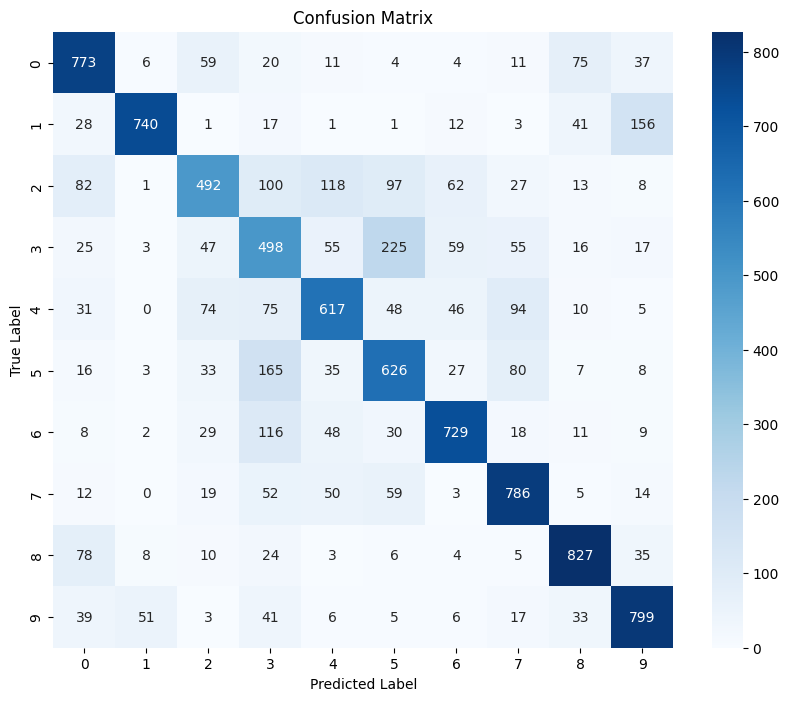

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.91      0.74      0.82      1000
           2       0.64      0.49      0.56      1000
           3       0.45      0.50      0.47      1000
           4       0.65      0.62      0.63      1000
           5       0.57      0.63      0.60      1000
           6       0.77      0.73      0.75      1000
           7       0.72      0.79      0.75      1000
           8       0.80      0.83      0.81      1000
           9       0.73      0.80      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [ ]:
# 모델 예측
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# confusion matrix
conf_mtx = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mtx, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 분류 보고서
print(classification_report(y_true, y_pred_classes))

- accuracy: 69%, 일부 클래스에서의 낮은 성능이 전체 정확도에 영향을 미친 것으로 보인다.
- macro avg는 각 클래스에 대해 동일한 가중치를 부여해 평균을 낸 값이며, weighted avg는 각 클래스의 샘플 수에 비례하여 평균을 낸 값이다. 두 값 모두 0.69로 나타나, 대부분의 클래스에서 일관되게 성능이 제한적이라고 해석할 수 있다.

### Fine-Tuning

In [ ]:
from sklearn.model_selection import train_test_split
import random

tf.random.set_seed(42)

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

learning_rates = [0.001, 0.005]
epochs_list = [10]
batch_sizes = [32, 64]
activation_functions = ["relu", "tanh"]
optimizers_list = [
    tf.keras.optimizers.SGD,
    tf.keras.optimizers.Adam,
    tf.keras.optimizers.RMSprop
]

combinations = [
    (random.choice(learning_rates),
     random.choice(epochs_list),
     random.choice(batch_sizes),
     random.choice(activation_functions),
     random.choice(optimizers_list))
    for _ in range(4)
]

best_accuracy = 0
best_config = None

for learning_rate, epochs, batch_size, activation, optimizer_class in combinations:
    DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation=activation, kernel_initializer="he_normal")

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=[32, 32, 3]),
        DefaultConv2D(filters=64, kernel_size=7),
        tf.keras.layers.MaxPool2D(),
        DefaultConv2D(filters=128),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=activation),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation=activation),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    optimizer = optimizer_class(learning_rate=learning_rate)

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid), batch_size=batch_size, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    print(f"Learning Rate: {learning_rate}, Epochs: {epochs}, Batch Size: {batch_size}, Activation: {activation}, Optimizer: {optimizer_class.__name__}, Test Accuracy: {test_accuracy:.4f}")

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_config = (learning_rate, epochs, batch_size, activation, optimizer_class.__name__)

print("\nBest Configuration:")
print(f"Learning Rate: {best_config[0]}, Epochs: {best_config[1]}, Batch Size: {best_config[2]}, Activation: {best_config[3]}, Optimizer: {best_config[4]}, Test Accuracy: {best_accuracy:.4f}")


Learning Rate: 0.001, Epochs: 10, Batch Size: 64, Activation: tanh, Optimizer: SGD, Test Accuracy: 0.4868
Learning Rate: 0.005, Epochs: 10, Batch Size: 64, Activation: tanh, Optimizer: SGD, Test Accuracy: 0.5757
Learning Rate: 0.005, Epochs: 10, Batch Size: 64, Activation: tanh, Optimizer: RMSprop, Test Accuracy: 0.1000
Learning Rate: 0.001, Epochs: 10, Batch Size: 32, Activation: relu, Optimizer: Adam, Test Accuracy: 0.6166

Best Configuration:
Learning Rate: 0.001, Epochs: 10, Batch Size: 32, Activation: relu, Optimizer: Adam, Test Accuracy: 0.6166


learning_rates, epochs_list, batch_sizes, activation_functions, optimizers_list를 정의하고 랜덤하게 4가지의 조합을 선택하여 실험했다. Test Accuracy가 예상보다 좋지 않기 때문에, 좋은 결과를 보였던 조합 위주로 epoch를 줄여 추가로 튜닝을 진행한다.

In [ ]:
from sklearn.model_selection import train_test_split
import random

tf.random.set_seed(42)

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

learning_rates = [0.001, 0.005]
epochs_list = [5]
batch_sizes = [64]
activation_functions = ["tanh"]
optimizers_list = [
    tf.keras.optimizers.SGD,
    tf.keras.optimizers.Adam
]

combinations = [
    (random.choice(learning_rates),
     random.choice(epochs_list),
     random.choice(batch_sizes),
     random.choice(activation_functions),
     random.choice(optimizers_list))
    for _ in range(4)
]

best_accuracy = 0
best_config = None

for learning_rate, epochs, batch_size, activation, optimizer_class in combinations:
    DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation=activation, kernel_initializer="he_normal")

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=[32, 32, 3]),
        DefaultConv2D(filters=64, kernel_size=7),
        tf.keras.layers.MaxPool2D(),
        DefaultConv2D(filters=128),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=activation),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation=activation),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    optimizer = optimizer_class(learning_rate=learning_rate)

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid), batch_size=batch_size, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    print(f"Learning Rate: {learning_rate}, Epochs: {epochs}, Batch Size: {batch_size}, Activation: {activation}, Optimizer: {optimizer_class.__name__}, Test Accuracy: {test_accuracy:.4f}")

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_config = (learning_rate, epochs, batch_size, activation, optimizer_class.__name__)

print("\nBest Configuration:")
print(f"Learning Rate: {best_config[0]}, Epochs: {best_config[1]}, Batch Size: {best_config[2]}, Activation: {best_config[3]}, Optimizer: {best_config[4]}, Test Accuracy: {best_accuracy:.4f}")

Learning Rate: 0.001, Epochs: 5, Batch Size: 64, Activation: tanh, Optimizer: Adam, Test Accuracy: 0.4556
Learning Rate: 0.001, Epochs: 5, Batch Size: 64, Activation: tanh, Optimizer: Adam, Test Accuracy: 0.1000
Learning Rate: 0.001, Epochs: 5, Batch Size: 64, Activation: tanh, Optimizer: SGD, Test Accuracy: 0.4516
Learning Rate: 0.005, Epochs: 5, Batch Size: 64, Activation: tanh, Optimizer: SGD, Test Accuracy: 0.5280

Best Configuration:
Learning Rate: 0.005, Epochs: 5, Batch Size: 64, Activation: tanh, Optimizer: SGD, Test Accuracy: 0.5280


Test Accuracy가 예상보다 좋지 않기 때문에, k폴딩을 수행해본다.

In [ ]:
from sklearn.model_selection import KFold
import random
import numpy as np

tf.random.set_seed(42)

# 데이터셋 로드 및 정규화
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0

# 하이퍼파라미터 옵션 정의
learning_rates = [0.001, 0.005]
epochs_list = [5]
batch_sizes = [32]
activation_functions = ["relu", "tanh"]
optimizers_list = [
    tf.keras.optimizers.SGD,
    tf.keras.optimizers.Adam,
    tf.keras.optimizers.RMSprop
]

# 랜덤으로 하이퍼파라미터 조합 선택
combinations = [
    (random.choice(learning_rates),
     random.choice(epochs_list),
     random.choice(batch_sizes),
     random.choice(activation_functions),
     random.choice(optimizers_list))
    for _ in range(3)  # 하이퍼파라미터 조합을 3개로 설정
]

# 모델 학습 및 평가 (K-Fold Cross-Validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_accuracy = 0
best_config = None

for learning_rate, epochs, batch_size, activation, optimizer_class in combinations:
    fold_accuracies = []

    for train_index, val_index in kf.split(X_train_full):
        X_train, X_valid = X_train_full[train_index], X_train_full[val_index]
        y_train, y_valid = y_train_full[train_index], y_train_full[val_index]

        # 모델 구축
        DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation=activation, kernel_initializer="he_normal")

        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=[32, 32, 3]),
            DefaultConv2D(filters=64, kernel_size=7),
            tf.keras.layers.MaxPool2D(),
            DefaultConv2D(filters=128),
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation=activation),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(64, activation=activation),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(10, activation="softmax")
        ])

        # 옵티마이저 정의
        optimizer = optimizer_class(learning_rate=learning_rate)

        # 모델 컴파일
        model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

        # 모델 학습
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid), batch_size=batch_size, verbose=0)

        # 검증 정확도 기록
        val_loss, val_accuracy = model.evaluate(X_valid, y_valid, verbose=0)
        fold_accuracies.append(val_accuracy)

    # 각 fold의 평균 정확도 계산
    mean_accuracy = np.mean(fold_accuracies)
    print(f"Learning Rate: {learning_rate}, Epochs: {epochs}, Batch Size: {batch_size}, Activation: {activation}, Optimizer: {optimizer_class.__name__}, Mean Validation Accuracy: {mean_accuracy:.4f}")

    # 최고 성능 기록
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_config = (learning_rate, epochs, batch_size, activation, optimizer_class.__name__)

print("\nBest Configuration:")
print(f"Learning Rate: {best_config[0]}, Epochs: {best_config[1]}, Batch Size: {best_config[2]}, Activation: {best_config[3]}, Optimizer: {best_config[4]}, Mean Validation Accuracy: {best_accuracy:.4f}")

Learning Rate: 0.001, Epochs: 5, Batch Size: 32, Activation: tanh, Optimizer: SGD, Mean Validation Accuracy: 0.4772
Learning Rate: 0.001, Epochs: 5, Batch Size: 32, Activation: tanh, Optimizer: SGD, Mean Validation Accuracy: 0.4781
Learning Rate: 0.005, Epochs: 5, Batch Size: 32, Activation: tanh, Optimizer: Adam, Mean Validation Accuracy: 0.1012

Best Configuration:
Learning Rate: 0.001, Epochs: 5, Batch Size: 32, Activation: tanh, Optimizer: SGD, Mean Validation Accuracy: 0.4781


그다지 성능이 좋지 않다. 아무래도 GPU상의 문제로 epoch, batch, learning rate 크기를 늘리는데에 한계가 있어서라고 생각한다. 하이퍼파라미터튜닝은 위에서 진행했던 조합이 가장 우수했던 것으로 결론을 내리려고 한다.

Learning Rate: 0.001, Epochs: 10, Batch Size: 32, Activation: relu, Optimizer: Adam, Test Accuracy: 0.6166

이처럼 하이퍼파라미터튜닝으로는 한계가 있는 것을 확인할 수 있었다. 이러한 상황에서 파인튜닝을 시도해볼 수 있다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# 데이터셋 로드 및 정규화
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# 사전 학습된 ResNet50 모델 로드 (ImageNet 가중치 사용)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 새로운 출력층 추가
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())  # Feature map의 평균을 구함
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # CIFAR-10은 10개의 클래스

# 사전 학습된 모델의 레이어들을 고정 (학습하지 않음)
base_model.trainable = False

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 상위 레이어 학습
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size=32)

# 사전 학습된 모델의 일부 레이어를 미세 조정하도록 설정
# 상위 몇 개의 레이어는 학습하도록 변경
base_model.trainable = True
for layer in base_model.layers[:-10]:  # 마지막 10개 레이어는 학습
    layer.trainable = False

# 모델 재컴파일
model.compile(optimizer=SGD(learning_rate=1e-4, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 전체 모델 파인튜닝
fine_tune_history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size=32)

# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy after Fine-Tuning: {test_accuracy:.4f}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.0976 - loss: 2.3424 - val_accuracy: 0.0973 - val_loss: 2.3028
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.1001 - loss: 2.3028 - val_accuracy: 0.0973 - val_loss: 2.3028
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1007 - loss: 2.3033 - val_accuracy: 0.0973 - val_loss: 2.3028
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.1010 - loss: 2.3028 - val_accuracy: 0.0973 - val_loss: 2.3028
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1012 - loss: 2.3028 - val_accuracy: 0.0973 - val_loss: 2.3028
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1012 - loss: 2.3028 - val_accuracy: 0.0973 - val_loss: 2.3028
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1012 - loss: 2.3028 - val_accuracy: 0.0973 - val_loss: 2.3028
Epoch 8/10
1250/1250 ━━━━━━━━━

KeyboardInterrupt: 

여전히 성능이 기대에 미치지 못하기 때문에, 앞서 괜찮았던 조합으로 다시 시도해볼 수 있다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# 데이터셋 로드 및 정규화
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# 사전 학습된 ResNet50 모델 로드 (ImageNet 가중치 사용)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 새로운 출력층 추가
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())  # Feature map의 평균을 구함
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # CIFAR-10은 10개의 클래스

# 사전 학습된 모델의 레이어들을 고정 (학습하지 않음)
base_model.trainable = False

# 모델 컴파일 (지정된 파라미터 적용)
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 상위 레이어 학습 (에포크 수: 10, 배치 크기: 32)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size=32)

# 사전 학습된 모델의 일부 레이어를 학습 가능하도록 설정하여 미세 조정
base_model.trainable = True
for layer in base_model.layers[:-10]:  # 마지막 10개 레이어는 학습 가능하게 설정
    layer.trainable = False

# 모델 재컴파일 (학습률을 낮게 설정하여 미세 조정)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 전체 모델 파인튜닝 (에포크 수: 10, 배치 크기: 32)
fine_tune_history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size=32)

# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy after Fine-Tuning: {test_accuracy:.4f}")

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.0997 - loss: 2.3688 - val_accuracy: 0.0973 - val_loss: 2.3027
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.0973 - val_loss: 2.3027
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.0999 - loss: 2.3028 - val_accuracy: 0.0973 - val_loss: 2.3028
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.1018 - loss: 2.3028 - val_accuracy: 0.0973 - val_loss: 2.3028
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.1009 - loss: 2.3028 - val_accuracy: 0.0973 - val_loss: 2.3028
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.1013 - loss: 2.3028 - val_accuracy: 0.0973 - val_loss: 2.3028
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.1007 - loss: 2.3028 - val_accuracy: 0.0973 - val_loss: 2.3028
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.1011 - 

KeyboardInterrupt: 

파인튜닝 결과, 테스트 정확도가 기대만큼 개선되지 않았다. 초기 설정 (learning_rate=0.001, epochs=10, batch_size=32, activation='relu', optimizer='Adam')으로 얻었던 테스트 정확도 61.66%와 비교했을 때, 사전 학습된 모델을 사용한 파인튜닝 과정에서도 큰 성능 향상을 이루지 못했다. 이에 대해 몇 가지 원인과 반성 사항을 다음과 같이 정리하였다.

1. 사전 학습된 모델의 부적합성
ResNet50은 ImageNet 데이터셋에서 학습된 사전 학습 모델로, 더 크고 복잡한 이미지 분류 작업에 적합하게 설계되었다. 그러나 CIFAR-10 데이터셋은 비교적 작은 크기의 이미지(32x32)로 구성되어 있으며, 10개의 단순한 클래스만을 포함하고 있다. 이로 인해 ResNet50과 같은 복잡한 사전 학습 모델이 이 작업에 적합하지 않았을 수 있다. 과도한 복잡도는 오히려 모델의 학습을 방해하거나, 성능이 높아지지 않도록 영향을 미쳤을 가능성이 있다.

2. 하이퍼파라미터 설정의 문제
파인튜닝 단계에서 학습률을 1e-4로 낮추었지만, 이는 사전 학습된 가중치의 변경을 최소화하기 위함이었다. 그러나 초기 설정으로부터 얻은 정확도와 비교해볼 때, 학습률이 너무 낮아 학습이 제대로 이루어지지 않았거나, 이미 학습된 특성에 비해 CIFAR-10 데이터셋에 맞게 충분히 변하지 않았을 가능성이 있다. 또한 배치 크기나 에포크 수의 적절한 조정 없이 파인튜닝을 수행하여 모델이 충분히 수렴하지 못했을 가능성도 있다.

3. 데이터셋의 부적합한 전처리와 활용
사전 학습된 ResNet50은 224x224 크기의 이미지 입력을 전제로 하고 학습된 모델이다. 그러나 CIFAR-10은 32x32 크기의 이미지를 포함하고 있기 때문에, 이 작은 입력 크기는 모델이 가진 높은 수준의 필터가 적절하게 작동하지 못하게 만들었을 수 있다. 이로 인해 모델이 유용한 특징을 추출하는 데 어려움을 겪었을 수 있다. 또한 데이터 증강(data augmentation) 등 추가적인 전처리 방법을 활용하지 않아, 데이터가 충분히 다양하지 못한 상태에서 학습이 이루어졌을 가능성도 있다.

4. 레이어 고정 전략의 한계
사전 학습된 모델에서 마지막 몇 개의 레이어만 학습 가능하도록 설정한 전략이 CIFAR-10 데이터에 적합하지 않았을 수 있다. ResNet50의 대부분의 레이어가 고정된 상태에서는 모델이 새로운 데이터셋의 특성을 제대로 학습할 수 없기 때문에, 모델이 데이터셋에 적절히 적응하지 못했을 수 있다. 이는 낮은 성능의 주요 원인 중 하나일 수 있다.

**개선 방향 및 향후 계획**


모델 선택의 변경: ResNet50과 같은 대형 모델 대신, CIFAR-10과 같은 작은 이미지에 더 적합한 간단한 CNN 모델을 사용하는 것을 고려해야 한다. 예를 들어, LeNet-5 또는 VGG-16과 같은 비교적 간단한 모델이 CIFAR-10 분류 작업에서 더 적합한 성능을 낼 수 있다.

학습률을 재조정하고, 하이퍼파라미터 탐색을 통해 최적의 값을 찾는 과정이 필요하다. 특히 학습률은 충분히 다양하게 시도해 보고, learning rate scheduler를 도입하여 점진적으로 조정하는 방식도 고려할 수 있다. 또한 에포크 수와 배치 크기도 다양하게 실험해 볼 필요가 있다.

처음부터 모든 레이어를 고정하지 않고, 모델의 일부 레이어만 고정한 상태에서 전체 모델을 학습하는 방안을 고려해야 한다. 처음에는 상위 레이어만 학습한 후, 점차 하위 레이어를 학습 가능하도록 조정하여 모델이 데이터셋의 특성을 더 잘 반영하도록 해야 한다.

ResNet50 외에도 MobileNet, VGG 등 다양한 사전 학습된 모델을 테스트하여 CIFAR-10에 적합한 모델을 찾아야 한다. 특히 MobileNet과 같은 가벼운 모델이 작은 이미지 분류 작업에서 좋은 성능을 보일 수 있다.
